# <font color='blue'>ЗАДАЧИ</font>
**1. Проверить, отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение.** Насколько обучение сокращает время прохождения этапов?

**2. Посмотреть, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь.** Нужно доказать, что успешное обучение само по себе влияет на оплату, и без разницы, каким этапом оно шло.

**3. Дополнительная задача.** Как часто пользователи начинают обучение после того, как они выбрали уровень сложности? Это позволит нам понять, насколько прозрачен процесс взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.

In [2]:
# Загрузка необходимых библиотек
import pandas as pd
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Загружаем данные из файла **events.csv** и выбираем, только тех пользователей, которые зарегистрировались в 2018 году

In [3]:
events_df=pd.read_csv('events.csv') 
cond = (events_df.start_time>='2018-01-01') & (events_df.start_time<'2019-01-01') & (events_df.event_type=='registration')
registered = events_df[cond]['user_id'].to_list() # список пользователей, зарегистрированных в 2018
events_df.start_time=events_df['start_time'].str.replace('T', ' ', regex=False) 
events = events_df[events_df.user_id.isin(registered)] #данных пользователей, которые зарегистрировались в 2018 году
events['start_time']=pd.to_datetime(events['start_time']) 
#переименовываем столбцы "id" и "start_time" в датафрейме и оставляем нужные столбцы
events = events.rename(columns={'id':'event_id', 'start_time':'event_time'})
events.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66959 entries, 51405 to 118364
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        66959 non-null  int64         
 1   event_type      66959 non-null  object        
 2   selected_level  8342 non-null   object        
 3   event_time      66959 non-null  datetime64[ns]
 4   tutorial_id     32954 non-null  float64       
 5   user_id         66959 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.6+ MB


Загружаем данные из файла **purchase.csv** и выбираем, только тех пользователей, которые зарегестрировались в 2018 году

In [43]:
purchase_df=pd.read_csv('purchase.csv')
purchase_df.event_datetime=purchase_df['event_datetime'].str.replace('T', ' ', regex=False) 
purchase = purchase_df[purchase_df.user_id.isin(registered)] #данных пользователей, которые зарегистрировались в 2018 году
purchase['event_datetime']=pd.to_datetime(purchase['event_datetime']) 
#переименовываем столбцы "id" и "event_datetime" в датафрейме
purchase = purchase.rename(columns={'id':'purchase_id', 'event_datetime':'event_time'})
purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1171 to 2778
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   purchase_id  1600 non-null   int64         
 1   user_id      1600 non-null   int64         
 2   event_time   1600 non-null   datetime64[ns]
 3   amount       1600 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 62.5 KB


In [44]:
purchase['event_type'] = 'purchase' #Добавим в датафрейм purchase столбец event_type

In [45]:
total_events_df = pd.concat([events,purchase],sort=False).reset_index(drop=True).sort_values('event_time') #объединим датафреймы
total_events_df.info() 
total_events_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68559 entries, 0 to 68558
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        66959 non-null  float64       
 1   event_type      68559 non-null  object        
 2   selected_level  8342 non-null   object        
 3   event_time      68559 non-null  datetime64[ns]
 4   tutorial_id     32954 non-null  float64       
 5   user_id         68559 non-null  int64         
 6   purchase_id     1600 non-null   float64       
 7   amount          1600 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 4.7+ MB


,event_id,event_type,selected_level,event_time,tutorial_id,user_id,purchase_id,amount
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN
...,...,...,...,...,...,...,...,...
68554,NaN,purchase,NaN,2019-01-02 03:48:19,NaN,47498,18441.0,100.0
68555,NaN,purchase,NaN,2019-01-02 23:26:26,NaN,47647,18442.0,150.0
68556,NaN,purchase,NaN,2019-01-03 00:36:36,NaN,47554,18443.0,50.0
68557,NaN,purchase,NaN,2019-01-04 12:51:41,NaN,47742,18448.0,50.0


Найдём пользователей, которые *прошли обучение*:

In [46]:
# Найдём пользвателей, начавших обучение
tutorial_start_users=total_events_df[total_events_df['event_type'] == 'tutorial_start']['user_id'].unique() 
# Выведем количество пользователей
print(len(tutorial_start_users))

11858


In [47]:
# Найдём пользователей, окончивших обучение хотя бы раз
tutorial_finish_users = total_events_df[total_events_df['event_type'] == 'tutorial_finish']['user_id'].unique() 
print(len(tutorial_finish_users)) # Выведем их количество

10250


Найдём пользователей, *не проходивших обучение*:

In [48]:
all_users = total_events_df['user_id'].unique()
set_all_users = set(all_users)
users_not_started_tutorial = set_all_users.difference(tutorial_start_users) # Пользователи, не проходившие обучение
print(len(users_not_started_tutorial))
print(len(set_all_users)-len(tutorial_start_users) == len(users_not_started_tutorial)) # Проверим правильность вывода

8068
True


Найдём пользователей, которые начали, но *не закончили обучение*:

In [49]:
users_with_started_tutorial = set(tutorial_start_users)
users_not_finished_but_started_tutorial = users_with_started_tutorial.difference(set(tutorial_finish_users)) 
print(len(users_not_finished_but_started_tutorial)) # Выведем количество пользователей, начавших, но не закончивших обучение

1608


In [55]:
# Сводная таблица по пользователям:
pivot_df=total_events_df.pivot_table(values=['event_time'], index=['user_id'], columns=['event_type'], aggfunc='min')
# Избавляемся от мульти-индекса в названии столбцов
pivot_df.columns=list(map('_'.join,pivot_df))
pivot_df.reset_index(drop=True)
pivot_df['user_id']=pivot_df.index
pivot_df['tutorial'] = pivot_df.apply(lambda x: 'finished' if not pd.isnull(x.event_time_tutorial_finish) else 'no_tutorial' if pd.isnull(x.event_time_tutorial_start) \
    else 'started_only', axis=1)
pivot_df

,event_time_level_choice,event_time_pack_choice,event_time_purchase,event_time_registration,event_time_tutorial_finish,event_time_tutorial_start,user_id,tutorial
user_id,,,,,,,,
27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,27832,no_tutorial
27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,27833,finished
27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,27834,finished
27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,27835,finished
27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,27836,finished
...,...,...,...,...,...,...,...,...
47753,2018-12-31 22:36:19,2018-12-31 22:38:05,NaT,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56,47753,finished
47754,NaT,NaT,NaT,2018-12-31 19:14:08,NaT,NaT,47754,no_tutorial
47755,2019-01-01 05:04:52,NaT,NaT,2018-12-31 21:15:14,2019-01-01 00:09:30,2019-01-01 00:08:14,47755,finished


In [56]:
pivot_df_diff=pivot_df # добавим колонки в сводную таблицу с разницами между этапами
pivot_df_diff['time_registration_level_choice'] = pivot_df['event_time_level_choice']-pivot_df['event_time_registration']
pivot_df_diff['time_level_choice_pack_choice'] = pivot_df['event_time_pack_choice']-pivot_df['event_time_level_choice']
pivot_df_diff['time_pack_choice_purchase'] = pivot_df['event_time_purchase']-pivot_df['event_time_pack_choice'] 
pivot_df_diff

,event_time_level_choice,event_time_pack_choice,event_time_purchase,event_time_registration,event_time_tutorial_finish,event_time_tutorial_start,user_id,tutorial,time_registration_level_choice,time_level_choice_pack_choice,time_pack_choice_purchase
user_id,,,,,,,,,,,
27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,27832,no_tutorial,NaT,NaT,NaT
27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,27833,finished,NaT,NaT,NaT
27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,27834,finished,NaT,NaT,NaT
27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,27835,finished,0 days 08:42:35,0 days 00:01:21,NaT
27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,27836,finished,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...
47753,2018-12-31 22:36:19,2018-12-31 22:38:05,NaT,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56,47753,finished,0 days 03:37:24,0 days 00:01:46,NaT
47754,NaT,NaT,NaT,2018-12-31 19:14:08,NaT,NaT,47754,no_tutorial,NaT,NaT,NaT
47755,2019-01-01 05:04:52,NaT,NaT,2018-12-31 21:15:14,2019-01-01 00:09:30,2019-01-01 00:08:14,47755,finished,0 days 07:49:38,NaT,NaT


In [65]:
# Выбираем нужные столбцы из сводной таблицы
pivot_df_diffd=pivot_df_diff[['tutorial','time_registration_level_choice','time_level_choice_pack_choice','time_pack_choice_purchase']] 
pivot_df_diffd 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19926 entries, 27832 to 47757
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   tutorial                        19926 non-null  object         
 1   time_registration_level_choice  8342 non-null   timedelta64[ns]
 2   time_level_choice_pack_choice   5737 non-null   timedelta64[ns]
 3   time_pack_choice_purchase       1600 non-null   timedelta64[ns]
dtypes: object(1), timedelta64[ns](3)
memory usage: 778.4+ KB


,tutorial,time_registration_level_choice,time_level_choice_pack_choice,time_pack_choice_purchase
user_id,,,,
27832,no_tutorial,NaT,NaT,NaT
27833,finished,NaT,NaT,NaT
27834,finished,NaT,NaT,NaT
27835,finished,0 days 08:42:35,0 days 00:01:21,NaT
27836,finished,NaT,NaT,NaT
...,...,...,...,...
47753,finished,0 days 03:37:24,0 days 00:01:46,NaT
47754,no_tutorial,NaT,NaT,NaT
47755,finished,0 days 07:49:38,NaT,NaT


In [140]:
df_diff_rlc=pivot_df_diffd.groupby('tutorial')['time_registration_level_choice','time_level_choice_pack_choice','time_pack_choice_purchase'].sum()/pivot_df_diffd.groupby('tutorial')['time_registration_level_choice','time_level_choice_pack_choice','time_pack_choice_purchase'].count() # Группы по разнице времени регистрации и выбора уровня
df_diff_r=df_diff_rlc/pd.Timedelta('1 hour') # создадим сводную таблицу по категориям изменив время в числа
display(df_diff_rlc) # Выведем на экран среднюю разницу времен 
display(df_diff_r) # выведем на экран таблицу с не временным форматом, будем её использовать для построения графика

,time_registration_level_choice,time_level_choice_pack_choice,time_pack_choice_purchase
tutorial,,,
finished,0 days 07:05:36.854819357,0 days 00:05:18.146058732,3 days 17:17:59.641326883
no_tutorial,0 days 05:15:33.122448979,0 days 00:05:23.824324324,4 days 04:49:33.590909090
started_only,0 days 08:12:57.551816958,0 days 00:05:05.295687885,3 days 21:14:46.908396946


,time_registration_level_choice,time_level_choice_pack_choice,time_pack_choice_purchase
tutorial,,,
finished,7.093571,0.088374,89.299900
no_tutorial,5.259201,0.089951,100.825997
started_only,8.215987,0.084804,93.246363


Text(0.5, 1.0, 'Выбор пакета-покупка')

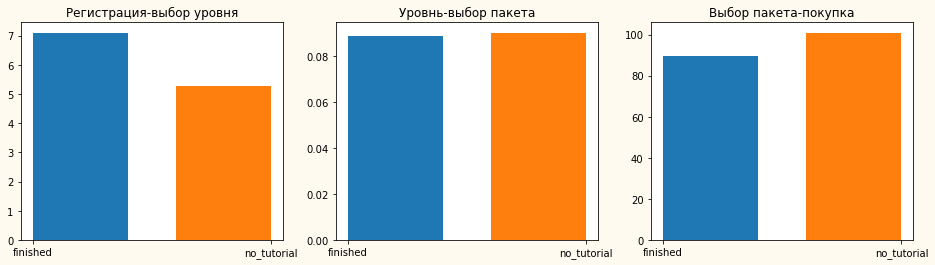

In [119]:
fig, axes = plt.subplots(1, 3, figsize=(16,4)) 
fig.set_facecolor('floralwhite') 
axes[0].bar(x = df_diff_r.index[0], height = df_diff_r['time_registration_level_choice'][0], width = 0.4, align = 'edge')
axes[0].bar(x = df_diff_r.index[1], height = df_diff_r['time_registration_level_choice'][1], width = -0.4, align = 'edge')
axes[1].bar(x = df_diff_r.index[0], height = df_diff_r['time_level_choice_pack_choice'][0], width = 0.4, align = 'edge')
axes[1].bar(x = df_diff_r.index[1], height = df_diff_r['time_level_choice_pack_choice'][1], width = -0.4, align = 'edge')
axes[2].bar(x = df_diff_r.index[0], height = df_diff_r['time_pack_choice_purchase'][0], width = 0.4, align = 'edge') 
axes[2].bar(x = df_diff_r.index[1], height = df_diff_r['time_pack_choice_purchase'][1], width = -0.4, align = 'edge')
axes[0].set_title('Регистрация-выбор уровня') 
axes[1].set_title('Уровнь-выбор пакета') 
axes[2].set_title('Выбор пакета-покупка') 

**finished** - *Прошли обучение* 

**no_tutorial** - *Не начинали обучение*

### Вывод по первому вопросу: 
Посмотрев на столбчатые диаграммы выше, можно сделать вывод, что на первом этапе время между регистрацией и выбором уровня больше у тех пользователей, которые проходили обучение (так как время было затрачено на обучение). На остальных этапах время отличается незначительно. Пользователи, которые прошли обучение немного быстрее проходят этапы.

In [121]:
# Создадим сводную таблицу, содержащую данные о количестве начала и окончания обучения
# те, кто начали обучение
users_tutorial_start = total_events_df.groupby(['user_id'])['event_type'].apply(lambda x: (x=='tutorial_start').sum()).reset_index().\
    rename(columns={'event_type': 'tutorial_start_count'}) 
# закончили обучение
users_tutorial_finished = total_events_df.groupby(['user_id'])['event_type'].apply(lambda x: (x=='tutorial_finish').sum()).reset_index().\
    rename(columns={'event_type': 'tutorial_finish_count'}) 
# оплатили
users_purchase = total_events_df.groupby(['user_id'])['event_type'].\
    apply(lambda x: (x=='purchase').sum()).reset_index().\
    rename(columns={'event_type': 'purchase_count'}) 
# объединим начавших обучение и оплативших
users_tutorial_start_purchase = users_tutorial_start.merge(users_purchase, on='user_id', how='inner')
# объединим закончивших обучение и оплативших
users_tutorial_finish_purchase=users_tutorial_finished.merge(users_purchase, on='user_id', how='inner')
# сгруппируем начавших обучение
grouped_tutorial_start_count = users_tutorial_start_purchase.groupby(['tutorial_start_count']).\
    agg({'user_id': 'count', 'purchase_count': 'sum'}).reset_index()
# сгруппируем закончивших обучение
grouped_tutorial_finish_count = users_tutorial_finish_purchase.groupby(['tutorial_finish_count']).\
    agg({'user_id': 'count', 'purchase_count': 'sum'}).reset_index()
grouped_tutorial_start_count.info()
display(grouped_tutorial_start_count)
grouped_tutorial_finish_count.info()
display(grouped_tutorial_finish_count) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   tutorial_start_count  10 non-null     int64
 1   user_id               10 non-null     int64
 2   purchase_count        10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


,tutorial_start_count,user_id,purchase_count
0,0,8068,22
1,1,9103,1207
2,2,1589,218
3,3,427,51
4,4,221,30
5,5,109,16
6,6,116,14
7,7,94,12
8,8,86,13
9,9,113,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   tutorial_finish_count  10 non-null     int64
 1   user_id                10 non-null     int64
 2   purchase_count         10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


,tutorial_finish_count,user_id,purchase_count
0,0,9676,153
1,1,8015,1143
2,2,1321,182
3,3,345,44
4,4,178,19
5,5,117,19
6,6,101,15
7,7,97,15
8,8,54,6
9,9,22,4


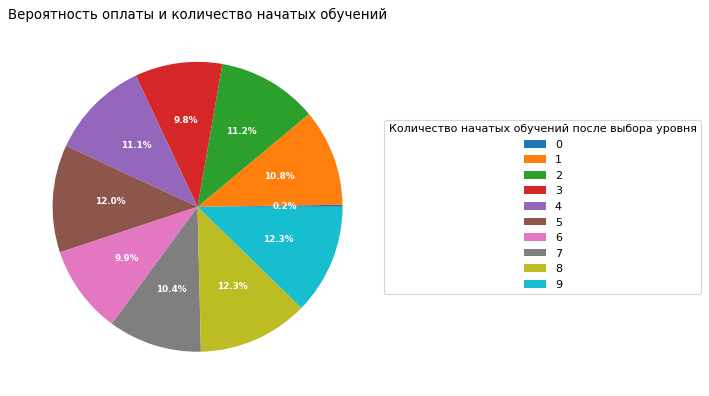

In [138]:
fig, ax = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect='equal'),dpi=80) 
wedges,texts,autotexts=ax.pie(list(grouped_tutorial_start_count['purchase_count']/grouped_tutorial_start_count['user_id']),
                              autopct='%1.1f%%',
                              textprops=dict(color='w')) 
ax.legend(wedges, list(grouped_tutorial_start_count['tutorial_start_count']), title='Количество начатых обучений после выбора уровня', loc='center left', bbox_to_anchor=(1,0,0.5,1)) 
plt.setp(autotexts,size=8,weight='bold') 
ax.set_title('Вероятность оплаты и количество начатых обучений') 
plt.show() 

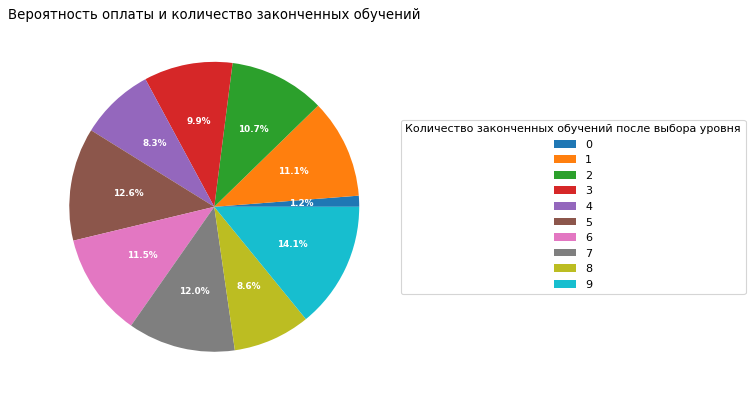

In [139]:
fig, ax = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect='equal'),dpi=80) 
wedges,texts,autotexts=ax.pie(list(grouped_tutorial_finish_count['purchase_count']/grouped_tutorial_finish_count['user_id']),
                              autopct='%1.1f%%',
                              textprops=dict(color='w')) 
ax.legend(wedges, list(grouped_tutorial_finish_count['tutorial_finish_count']), title='Количество законченных обучений после выбора уровня', loc='center left', bbox_to_anchor=(1,0,0.5,1)) 
plt.setp(autotexts,size=8,weight='bold') 
ax.set_title('Вероятность оплаты и количество законченных обучений') 
plt.show() 

### Вывод по второму вопросу: 
Из круговой диаграммы видно, что вероятность оплаты примерно одинакова у всех пользователей, которые проходили обучение. И не зависит от количества обучений. Отличается только у тех пользователей, которые не проходили обучение совсем - у таких пользователей процент оплаты очень мал и **составляет 0,2%** у тех кто начал обучение и **1,2%** у тех кто закончил обучение.

In [142]:
# Создадим сводную таблицу, содержащую данные о количестве начала обучения и количестве выбора уровня
# выбравшие уровень
users_level_choice = total_events_df.groupby(['user_id'])['event_type'].\
    apply(lambda x: (x=='level_choice').sum()).reset_index().\
    rename(columns={'event_type': 'level_choice_count'}) 
users_tutorial_start_level = users_tutorial_start.merge(users_level_choice, on='user_id', how='inner') 
# Сгруппируем данные о количестве начала обучения и количестве выбора уровня
grouped_tutorial_start_level = users_tutorial_start_level.groupby(['tutorial_start_count']).\
    agg({'user_id': 'count', 'level_choice_count': 'sum'}).reset_index()
grouped_tutorial_start_level

,tutorial_start_count,user_id,level_choice_count
0,0,8068,98
1,1,9103,6305
2,2,1589,1113
3,3,427,298
4,4,221,142
5,5,109,80
6,6,116,84
7,7,94,73
8,8,86,63
9,9,113,86


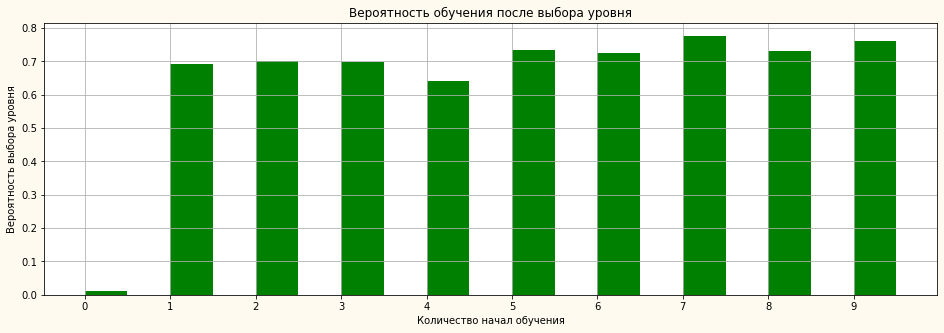

In [212]:
# Построим столбчатую диаграмму по таблице рассчитанной выше
from matplotlib.ticker import MultipleLocator 
x1=list(grouped_tutorial_start_level['tutorial_start_count']) 
y1=list(grouped_tutorial_start_level['level_choice_count']/grouped_tutorial_start_level['user_id']) 
majorLocator=MultipleLocator(1) 
fig, axes = plt.subplots(1, figsize=(16,5)) 
fig.set_facecolor('floralwhite') 
axes.bar(x = x1, height = y1, width = 0.5, align = 'edge', color = 'green')
axes.set_title('Вероятность обучения после выбора уровня') 
axes.set_xlabel('Количество начал обучения') 
axes.set_ylabel('Вероятность выбора уровня') 
axes.xaxis.set_major_locator(majorLocator) 
axes.grid(True) 

In [230]:
persent=(grouped_tutorial_start_level.user_id.sum()-grouped_tutorial_start_level.user_id[0])/grouped_tutorial_start_level.user_id.sum()
print(round(persent*100,2)) # Процент пользователей, которые начинают обучение после выбора уровня сложности от общего числа пользователей

59.51


### Вывод по третьему вопросу: 
По столбчатой диаграмме выше можно сделать вывод, что больше *60% пользователей* начинают обучение после того, как они выбрали уровень сложности. Если считать от общего числа пользователей, то **59,51% случаев** когда пользователи выбирают обучение после выбора уровня сложности.